In [1]:
import os
import time

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tqdm.auto import tqdm

from foldingdiff import sampling, plotting

In [2]:
def time_to_sample_length(length: int, num_samples: int, **kwargs) -> float:
    """Returns the time to sample a given number of samples for a given length."""
    start_t = time.time()

    # Run the sampling code
    sampling.sample_simple(
        "wukevin/foldingdiff_cath",
        n=num_samples,
        sweep_lengths=[length, length + 1],
        **kwargs
    )

    return time.time() - start_t

time_to_sample_length(50, 100)

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


30.82155466079712

In [3]:
gpu_times = {}
for n in tqdm([50, 60, 70, 80, 90, 100, 110, 120]):
    gpu_times[n] = time_to_sample_length(n, 100)

  0%|          | 0/8 [00:00<?, ?it/s]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Using time embedding: GaussianFourierProjection()


In [16]:
gpu_times

{50: 29.424456357955933,
 60: 36.74208998680115,
 70: 44.94945240020752,
 80: 50.973020792007446,
 90: 57.621809244155884,
 100: 62.97248148918152,
 110: 71.3362684249878,
 120: 79.72866487503052}

In [17]:
# Manual benchmarking
rfd_times = {
    50: 1831,
    70: 1868,
    90: 1979,
    110: 2327,
    120: 2447,
}

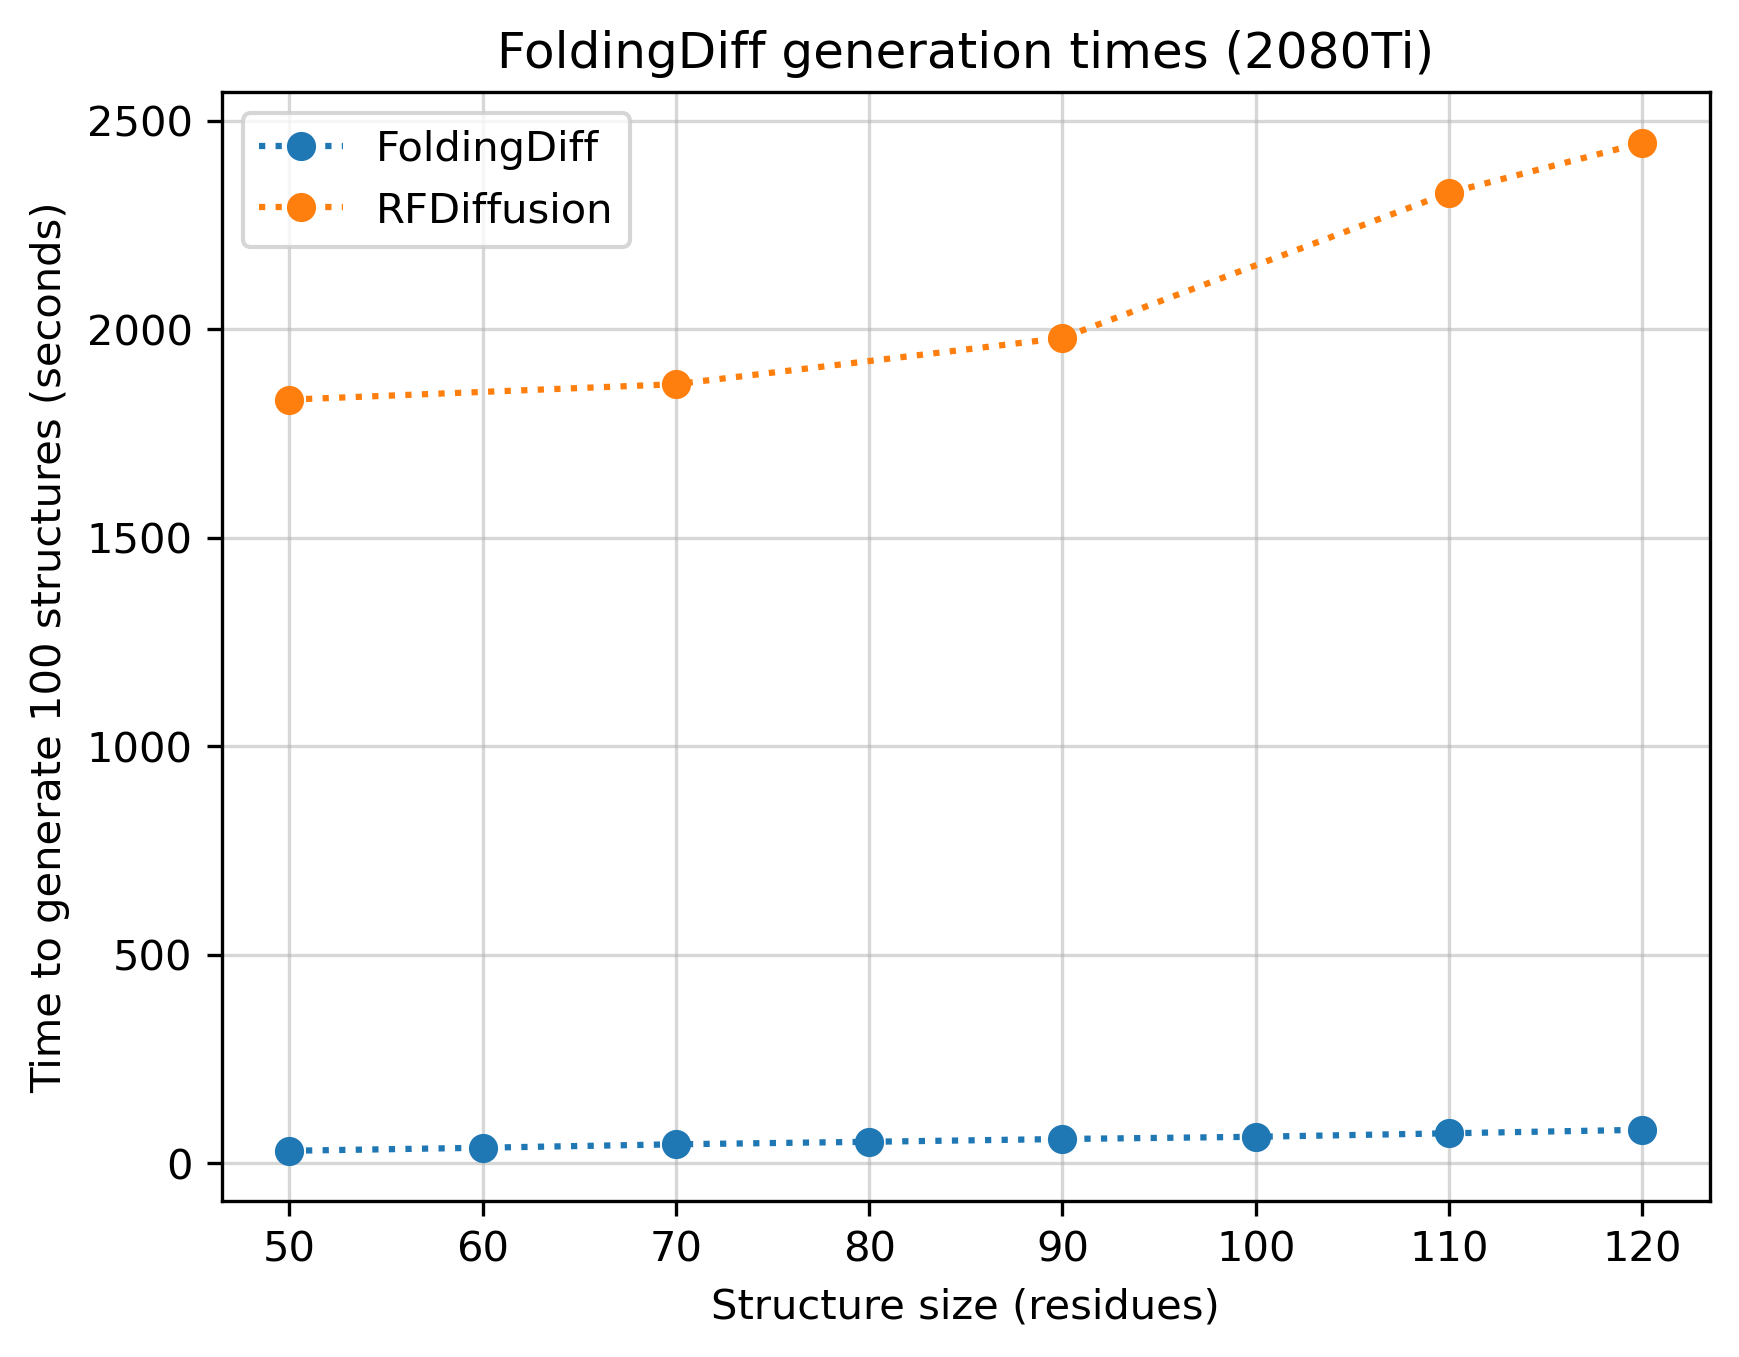

In [18]:
fig, ax = plt.subplots(dpi=300)
ax.plot(
    gpu_times.keys(),
    gpu_times.values(),
    label="FoldingDiff",
    marker='o',
    linestyle='dotted',
)
ax.plot(
    rfd_times.keys(),
    rfd_times.values(),
    label="RFDiffusion",
    marker='o',
    linestyle='dotted',
)
ax.grid(visible=True, which='both', alpha=0.5)
ax.legend()
ax.set(
    xlabel="Structure size (residues)",
    ylabel="Time to generate 100 structures (seconds)",
    title="FoldingDiff generation times (2080Ti)",
)
fig.savefig(os.path.join(plotting.PLOT_DIR, "generation_time.pdf"), bbox_inches='tight')
fig.show()